In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
data = pd.read_csv("H:\data\wineQualityReds.csv")

   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.4              0.70         0.00             1.9   
1           2            7.8              0.88         0.00             2.6   
2           3            7.8              0.76         0.04             2.3   
3           4           11.2              0.28         0.56             1.9   
4           5            7.4              0.70         0.00             1.9   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68  

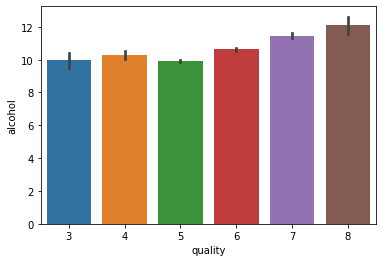

In [7]:
print(data.head())

sns.barplot(x = 'quality',y = 'fixed.acidity',data = data)

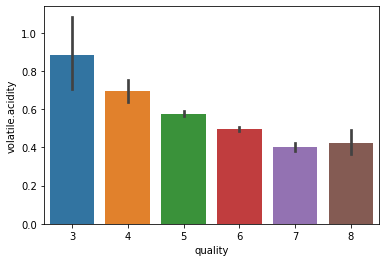

In [8]:
sns.barplot(x = 'quality',y = 'volatile.acidity',data = data)

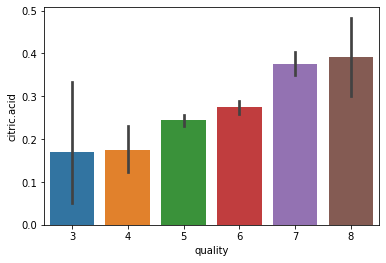

In [12]:
sns.barplot(x = 'quality',y = 'citric.acid',data = data)

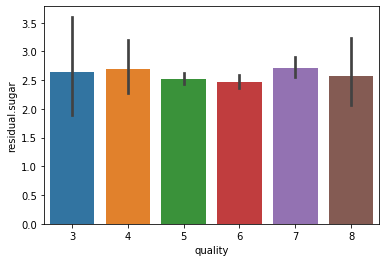

In [13]:
sns.barplot(x = 'quality',y = 'residual.sugar',data = data)

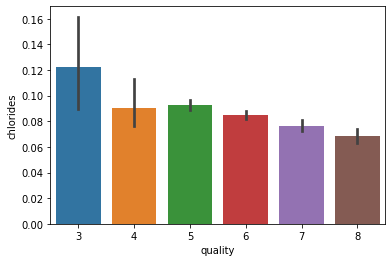

In [14]:
sns.barplot(y = 'chlorides',x = 'quality',data = data)

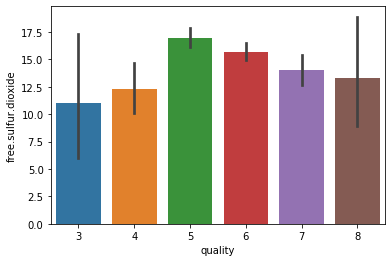

In [15]:
sns.barplot(y = 'free.sulfur.dioxide',x = 'quality',data = data)

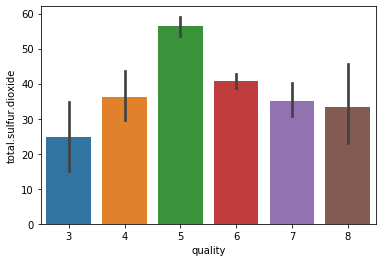

In [20]:
sns.barplot(x = 'quality',y = 'total.sulfur.dioxide',data = data)

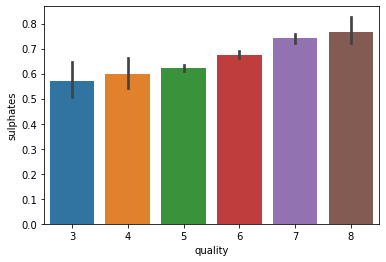

In [17]:
sns.barplot(x = 'quality',y = 'sulphates',data = data)

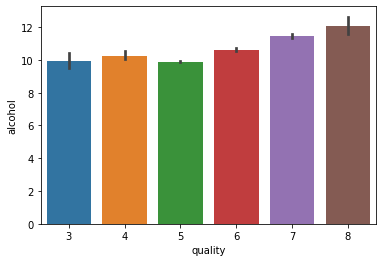

In [18]:
sns.barplot(x = 'quality',y = 'alcohol',data = data)

In [25]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
bing = (2,8)
gn = ['bad','good']
data['quality'] = pd.cut(data['quality'],bins = bing,labels = gn)
l_q = LabelEncoder()
data['quality'] = l_q.fit_transform(data['quality'])
data['quality'].values_counts()

TypeError: '<' not supported between instances of 'int' and 'str'

In [19]:
from sklearn.model_selection import train_test_split

In [104]:
x = data.iloc[:,0:12].values
y = data.iloc[:,12:13].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [105]:
from sklearn.ensemble import RandomForestClassifier
xy = RandomForestClassifier(n_estimators = 30)
xx = xy.fit(x_train,y_train)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
y_pre = xx.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
aaa = accuracy_score(y_pre,y_test)
print(accuracy_score(y_pre,y_test))
print("Confusion_metrics : \n",confusion_matrix(y_pre,y_test))
print("Classification report : \n" , classification_report(y_pre,y_test))

0.6575
Confusion_metrics : 
 [[  0   1   0   0   0   0]
 [  0   0   0   1   0   0]
 [  3  14 125  36   3   0]
 [  0   2  33 104  23   1]
 [  0   0   0  15  33   5]
 [  0   0   0   0   0   1]]
Classification report : 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.79      0.69      0.74       181
           6       0.67      0.64      0.65       163
           7       0.56      0.62      0.59        53
           8       0.14      1.00      0.25         1

    accuracy                           0.66       400
   macro avg       0.36      0.49      0.37       400
weighted avg       0.70      0.66      0.68       400



In [108]:
from sklearn.tree import DecisionTreeClassifier
aa = DecisionTreeClassifier()
zz = aa.fit(x_train,y_train)

In [109]:
pree = zz.predict(x_test)
pree

array([5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 4, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 5, 5, 7, 7, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       5, 7, 7, 7, 5, 7, 6, 6, 5, 6, 6, 7, 7, 5, 6, 5, 5, 5, 5, 5, 5, 7,
       5, 7, 5, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6,
       5, 3, 5, 5, 5, 5, 5, 5, 6, 5, 4, 7, 6, 6, 5, 7, 6, 4, 6, 5, 5, 6,
       6, 6, 5, 6, 5, 5, 7, 8, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 4, 5, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 7, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 5, 7, 7, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6, 7, 6, 7, 6, 6, 6,
       5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5,
       6, 4, 6, 5, 6, 5, 6, 7, 7, 7, 6, 7, 5, 4, 6, 6, 4, 5, 7, 7, 4, 7,
       5, 6, 7, 5, 7, 6, 4, 6, 7, 6, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 5, 6,
       6, 7, 4, 6, 8, 7, 7, 5, 6, 6, 6, 7, 6, 6, 6,

In [110]:
aaaa = accuracy_score(pree,y_test)
aaaa

0.6125

In [111]:
data

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [112]:
data.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [113]:
from sklearn.ensemble import RandomForestClassifier

xx = data.iloc[:,1:2]
yyy = data.iloc[:,12:13].values
x_train,x_test,y_train,y_test = train_test_split(xx,yyy,test_size = 0.25)
yy = RandomForestClassifier(n_estimators = 10)
zz = yy.fit(x_train,y_train)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [114]:
pre = zz.predict(x_test)

In [115]:
accuracy_score(pre,y_test)

0.4275

In [144]:
from sklearn.ensemble import RandomForestClassifier

xx = data.iloc[:,2:3]
yy = data.iloc[:,12:13].values
x_train,x_test,y_train,y_test = train_test_split(xx,yyy,test_size = 0.25)
yy = RandomForestClassifier(n_estimators = 10)
zz = yy.fit(x_train,y_train)
pre = zz.predict(x_test)
accuracy_score(pre,y_test)


G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.4425

In [117]:
pre = z.predict(x_test)

In [118]:
accuracy_score(pre,y_test)

0.43

In [119]:
def train_test(x,y):
    x = data.iloc[:,0:12].values
    y = data.iloc[:,12:13].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [137]:
y = data.iloc[:,12:13].values
for i in range(1,len(data.columns)):
    x = data.iloc[:,i+1:i+2].values
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
    from sklearn.ensemble import RandomForestClassifier
    xy = RandomForestClassifier(n_estimators = 30)
    xx = xy.fit(x_train,y_train)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
G:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed w

ValueError: Found array with 0 feature(s) (shape=(1199, 0)) while a minimum of 1 is required.

In [120]:
len(data.columns)

13

In [121]:
data

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [136]:
for i in range(1,10):
    data.iloc[:,i:i+1]
    data

In [132]:
for i in range(10):
    print(i+1)

1
2
3
4
5
6
7
8
9
10
